In [1]:
import json
import glob
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sentence_splitter import SentenceSplitter, split_text_into_sentences
import textwrap
from imgaug import augmenters as iaa

In [2]:
#!pip install sentence-splitter

In [3]:
#!pip install git+https://github.com/aleju/imgaug.git

In [4]:
# The function below will sort the files in numberical order 
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [5]:
etd_path = sorted(glob.glob('/home/mchou001/etds_json/*.json'), key = numericalSort)
#etd_path

In [6]:
#etd_label = sorted(glob.glob('/home/mchou001/updated_etd_label/*.txt'), key = numericalSort)

In [7]:
def json_parser(files):
    counter = 0
    list_line = []
    for filename in files:
        with open(filename, encoding='utf-8', mode='r') as file:
            data = json.loads(file.read())
            counter = counter + 1
            _text = []
            for i in range(len(data)):
                text = data[i].get("Line_and_BB")
                _text.append(text)
            for i, data in enumerate(_text):
                line_text = [text['Line'].strip('\n') for text in data]     
                list_line.append(line_text)
    
    return list_line

In [8]:
def json_parser_bbox(files):
    counter = 0
    list_bbox = []
    for filename in files:
        with open(filename, encoding='utf-8', mode='r') as file:
            data = json.loads(file.read())              
            counter = counter + 1
            _text = []
            for i in range(len(data)):
                    text = data[i].get("Line_and_BB")
                    _text.append(text)
            for i, data in enumerate(_text):
                bbox_text = [bbox['Bounding Box'] for bbox in data]
                list_bbox.append(bbox_text)
    
    return list_bbox

In [9]:
# dfList=[]
# colname=['file_id','labels']
# df = pd.read_csv('labels.txt', sep = "\t", header = None)
# dfList.append(df)
# concatDf = pd.concat(dfList, axis =0)
# concatDf.columns=colname
# concatDf.to_csv("labels.csv",index = None, encoding = 'utf-8')

In [10]:
json_files_line = json_parser(etd_path)

In [11]:
json_files_bbox = json_parser_bbox(etd_path)

In [12]:
# with open("labels_updated.txt", "w") as outfile:
#     for f in etd_label:
#         with open(f, 'r', encoding = 'utf-8') as infile:
#             labels = infile.read().strip()
#             outfile.write(labels)
#             outfile.write("\n")

In [13]:
dfList=[]
colname=['file_id', 'labels']
df = pd.read_csv("labels.txt", sep = "\t", header = None)
dfList.append(df)
concatDf = pd.concat(dfList, axis =0)
concatDf.columns=colname
concatDf.to_csv("labels.csv",index = None, encoding = 'utf-8')

In [14]:
labels_ = pd.read_csv("labels.csv", encoding = 'utf-8')

In [15]:
etd_label = labels_['labels']
etd_label

0              Label-TitlePage
1             Label-Dedication
2               Label-Abstract
3        Label-Acknowledgement
4         Label-TableofContent
                 ...          
92370         Label-Appendices
92371         Label-Appendices
92372         Label-Appendices
92373         Label-Appendices
92374         Label-Appendices
Name: labels, Length: 92375, dtype: object

In [16]:
etd_label.value_counts()

Label-Chapters                       71202
Label-Appendices                      9892
Label-ReferenceList                   3382
Label-Other                           3216
Label-TableofContent                  1114
Label-TitlePage                        911
Label-Abstract                         778
Label-ListofFigures                    586
Label-Acknowledgement                  507
Label-ListofTables                     477
Label-CurriculumVitae                  123
Label-Dedication                        76
Label-ChapterAbstract                   67
Label-DedicationOrAcknowledgement       37
Label-GeneralAbstract                    4
Label-CasesReferenced                    3
Name: labels, dtype: int64

In [17]:
file_id = labels_['file_id']
file_id

0            File Name: etd1_page1.png, 
1            File Name: etd1_page2.png, 
2            File Name: etd1_page3.png, 
3            File Name: etd1_page4.png, 
4            File Name: etd1_page5.png, 
                      ...               
92370    File Name: etd500_page188.png, 
92371    File Name: etd500_page189.png, 
92372    File Name: etd500_page190.png, 
92373    File Name: etd500_page191.png, 
92374    File Name: etd500_page192.png, 
Name: file_id, Length: 92375, dtype: object

In [18]:
res_list = [list(item) for item in list(zip(file_id, json_files_line, json_files_bbox, etd_label))]
dataframe = pd.DataFrame(res_list, columns = ['file_idx', 'text', 'bbox', 'class'])
dataframe.to_csv('ETD_aug.csv', index = False)

In [19]:
df1 = pd.read_csv("ETD_aug.csv")

In [20]:
df1

,file_idx,text,bbox,class
0,"File Name: etd1_page1.png,",['SOME ASPECTS OF RADIATION INDUCED NUCLEATION...,"[{'Width': 0.5021937489509583, 'Height': 0.012...",Label-TitlePage
1,"File Name: etd1_page2.png,","['2', 'Dedicated to my', 'parents and sisters']","[{'Width': 0.010438339784741402, 'Height': 0.0...",Label-Dedication
2,"File Name: etd1_page3.png,","['3', 'SOME ASPECTS OF RADIATION INDUCED NUCLE...","[{'Width': 0.010191080160439014, 'Height': 0.0...",Label-Abstract
3,"File Name: etd1_page4.png,","['4', 'Acknowledgements', 'I wish to thank for...","[{'Width': 0.011208509095013142, 'Height': 0.0...",Label-Acknowledgement
4,"File Name: etd1_page5.png,","['5', 'Table of Contents', 'Abstract', '3', 'A...","[{'Width': 0.009540759027004242, 'Height': 0.0...",Label-TableofContent
...,...,...,...,...
92370,"File Name: etd500_page188.png,","['APPENDIX D', 'RAW SCORE DATA', 'Item', 'Numb...","[{'Width': 0.13643890619277954, 'Height': 0.01...",Label-Appendices
92371,"File Name: etd500_page189.png,","['179', 'APPENDIX D (Continued)', 'Item', 'Num...","[{'Width': 0.03218996152281761, 'Height': 0.01...",Label-Appendices
92372,"File Name: etd500_page190.png,","['180', 'APPENDIX D (Continued)', 'Item', 'Num...","[{'Width': 0.031874675303697586, 'Height': 0.0...",Label-Appendices
92373,"File Name: etd500_page191.png,","['181', 'APPENDIX D (Continued)', 'Item', 'Num...","[{'Width': 0.029865413904190063, 'Height': 0.0...",Label-Appendices


### Abstract

In [21]:
abstract = df1[df1['class'] == 'Label-Abstract']

In [22]:
abstract

,file_idx,text,bbox,class
2,"File Name: etd1_page3.png,","['3', 'SOME ASPECTS OF RADIATION INDUCED NUCLE...","[{'Width': 0.010191080160439014, 'Height': 0.0...",Label-Abstract
107,"File Name: etd2_page2.png,","['2', 'PROCEDURES AS A REPRESENTATION FOR DATA...","[{'Width': 0.009375814348459244, 'Height': 0.0...",Label-Abstract
470,"File Name: etd3_page2.png,","['ii', 'AN EXPERIMENTAL INVESTIGATION OF', 'OI...","[{'Width': 0.017999999225139618, 'Height': 0.0...",Label-Abstract
506,"File Name: etd4_page2.png,",['DIGITAL SIMULATION OF A TRANSPORTATION INTER...,"[{'Width': 0.5640936493873596, 'Height': 0.011...",Label-Abstract
813,"File Name: etd5_page2.png,","['ii', 'Immersions of Symmetric Spaces', 'by',...","[{'Width': 0.021830996498465538, 'Height': 0.0...",Label-Abstract
...,...,...,...,...
91910,"File Name: etd498_page6.png,","['ABSTRACT OF THESIS', 'INDUCED PHOTOLYSIS OF ...","[{'Width': 0.23008552193641663, 'Height': 0.01...",Label-Abstract
91911,"File Name: etd498_page7.png,","['The photoreaction of decyl bromide and N, N-...","[{'Width': 0.6201814413070679, 'Height': 0.014...",Label-Abstract
91997,"File Name: etd499_page5.png,","['ABSTRACT', 'LAYERED BEAM VIBRATIONS INCLUDIN...","[{'Width': 0.09272374957799911, 'Height': 0.01...",Label-Abstract
92186,"File Name: etd500_page4.png,","['ABSTRACT OF THESIS', 'THE DEVELOPMENT AND FI...","[{'Width': 0.23877155780792236, 'Height': 0.01...",Label-Abstract


In [23]:
abstract.to_csv("abstract.csv")

In [19]:
dedication = df1[df1['class'] == 'Label-Dedication']

In [20]:
dedication

,file_idx,text,bbox,class
1,"File Name: etd1_page2.png,","['2', 'Dedicated to my', 'parents and sisters']","[{'Width': 0.010438339784741402, 'Height': 0.0...",Label-Dedication
995,"File Name: etd7_page4.png,","['4.', 'Dedicated to my parents, but for whose...","[{'Width': 0.021545251831412315, 'Height': 0.0...",Label-Dedication
5556,"File Name: etd40_page4.png,","['4', 'DEDICATION', 'I wish to thank Kit and J...","[{'Width': 0.007095214910805225, 'Height': 0.0...",Label-Dedication
5727,"File Name: etd43_page3.png,","['00003', 'i', 'in dedication to my parents;',...","[{'Width': 0.0743667259812355, 'Height': 0.019...",Label-Dedication
6660,"File Name: etd53_page5.png,",['This dissertation is dedicated to my parents...,"[{'Width': 0.5278833508491516, 'Height': 0.017...",Label-Dedication
...,...,...,...,...
87273,"File Name: etd469_page4.png,","['-ii-', 'To', 'Suzie', 'Reproduced with permi...","[{'Width': 0.04576736316084862, 'Height': 0.01...",Label-Dedication
87541,"File Name: etd471_page4.png,","['-ii-', 'To My Parents']","[{'Width': 0.04104027897119522, 'Height': 0.01...",Label-Dedication
87787,"File Name: etd472_page149.png,","['DEDICATION', 'To my', 'wife, Brooke, for her...","[{'Width': 0.09539125859737396, 'Height': 0.01...",Label-Dedication
87906,"File Name: etd473_page4.png,","['ii', 'To my Parents and Grandmother', 'Repro...","[{'Width': 0.01897614076733589, 'Height': 0.00...",Label-Dedication


In [21]:
cv = df1[df1['class'] == 'Label-CurriculumVitae']

In [22]:
cv

,file_idx,text,bbox,class
6471,"File Name: etd51_page132.png,","['VITA', 'JAMES A. HOLMES', 'SSN 243-74-8735',...","[{'Width': 0.024716822430491447, 'Height': 0.0...",Label-CurriculumVitae
6472,"File Name: etd51_page133.png,","['Blacksburg, Virginia.', 'August, 1978 - Dece...","[{'Width': 0.12241429090499878, 'Height': 0.01...",Label-CurriculumVitae
12263,"File Name: etd80_page258.png,","['VITA', 'Cynthia A. Arnold was born in Peoria...","[{'Width': 0.0402192585170269, 'Height': 0.011...",Label-CurriculumVitae
14413,"File Name: etd90_page311.png,","['VITAE', 'LINDA E. MORRIS', 'National Profess...","[{'Width': 0.05549896880984306, 'Height': 0.01...",Label-CurriculumVitae
14414,"File Name: etd90_page312.png,","['294', '1990', 'Research Committee Liaison to...","[{'Width': 0.029829813167452812, 'Height': 0.0...",Label-CurriculumVitae
...,...,...,...,...
83401,"File Name: etd448_page198.png,","['xii', 'research interests are in the history...","[{'Width': 0.03436648100614548, 'Height': 0.01...",Label-CurriculumVitae
83559,"File Name: etd449_page158.png,","['VITA', 'Dennis R. Capozza', 'Born:', 'Octobe...","[{'Width': 0.04524674639105797, 'Height': 0.01...",Label-CurriculumVitae
83766,"File Name: etd450_page207.png,","['VITA', 'I was born on March 11, 1946.', 'Rep...","[{'Width': 0.0418471023440361, 'Height': 0.011...",Label-CurriculumVitae
87795,"File Name: etd472_page157.png,","['VITA', 'April 4, 1931 - Born, Philadelphia, ...","[{'Width': 0.040983397513628006, 'Height': 0.0...",Label-CurriculumVitae


In [23]:
#df1.set_index("class", inplace = True)

In [24]:
label_deorack = df1[df1['class'] == 'Label-DedicationOrAcknowledgement']
label_deorack

,file_idx,text,bbox,class
471,"File Name: etd3_page3.png,","['iii', 'Acknowledgements', 'The author sincer...","[{'Width': 0.029359964653849602, 'Height': 0.0...",Label-DedicationOrAcknowledgement
507,"File Name: etd4_page3.png,","['3.', 'Acknowledgments', 'The research report...","[{'Width': 0.01923634298145771, 'Height': 0.01...",Label-DedicationOrAcknowledgement
814,"File Name: etd5_page3.png,","['ii', ""ACKNOWLEDGEMEN'T"", 'I am deeply indebt...","[{'Width': 0.03367955610156059, 'Height': 0.01...",Label-DedicationOrAcknowledgement
887,"File Name: etd6_page6.png,","['ACKNOWLEDGMENT', 'The author gratefully ackn...","[{'Width': 0.17284981906414032, 'Height': 0.00...",Label-DedicationOrAcknowledgement
996,"File Name: etd7_page5.png,","['5.', 'ACKNOWLEDGEMENTS', 'The author is part...","[{'Width': 0.02104201540350914, 'Height': 0.01...",Label-DedicationOrAcknowledgement
1059,"File Name: etd8_page3.png,","['3', 'ACKNOWLEDGEMENTS', 'The author grateful...","[{'Width': 0.01600104197859764, 'Height': 0.01...",Label-DedicationOrAcknowledgement
1158,"File Name: etd9_page3.png,","['ACKNOWLEDGEMENTS', 'The author wishes to ack...","[{'Width': 0.1636832058429718, 'Height': 0.011...",Label-DedicationOrAcknowledgement
1262,"File Name: etd10_page2.png,",['I wish to acknowledge the time and effort gi...,"[{'Width': 0.5901220440864563, 'Height': 0.017...",Label-DedicationOrAcknowledgement
1336,"File Name: etd11_page7.png,","['6', 'A C K N o W L D G M E N T S', 'I wish t...","[{'Width': 0.011687205173075199, 'Height': 0.0...",Label-DedicationOrAcknowledgement
1574,"File Name: etd13_page2.png,","['ACKNOWLEDGMENT', 'I would like to express my...","[{'Width': 0.1657361537218094, 'Height': 0.012...",Label-DedicationOrAcknowledgement


In [27]:
label_deorack.to_csv("dedicationOrAck.csv")

## Chapter Abstract

In [25]:
label_cabs = df1[df1['class'] == 'Label-ChapterAbstract']
label_cabs

,file_idx,text,bbox,class
6680,"File Name: etd53_page25.png,","['CHAPTER II', 'NONDESTRUCTIVE EVALUATION OF S...","[{'Width': 0.11907000839710236, 'Height': 0.01...",Label-ChapterAbstract
6716,"File Name: etd53_page61.png,","['CHAPTER III', 'BLOCK COPOLYMER ADHESIVE STUD...","[{'Width': 0.13229119777679443, 'Height': 0.01...",Label-ChapterAbstract
6738,"File Name: etd53_page83.png,","['CHAPTER IV', 'APPLICATION OF COMPRESSIVE CRE...","[{'Width': 0.12198726832866669, 'Height': 0.01...",Label-ChapterAbstract
6830,"File Name: etd53_page175.png,","['CHAPTER VI', 'ROLE OF MICROPHASE SEPARATION ...","[{'Width': 0.11860073357820511, 'Height': 0.01...",Label-ChapterAbstract
6877,"File Name: etd53_page222.png,","['CHAPTER VII', 'ROLE OF MICROPHASE SEPARATION...","[{'Width': 0.13072288036346436, 'Height': 0.01...",Label-ChapterAbstract
...,...,...,...,...
85365,"File Name: etd460_page17.png,","['7', 'CHAPTER I', 'CRUSTAL STRUCTURE IN THE I...","[{'Width': 0.009664619341492653, 'Height': 0.0...",Label-ChapterAbstract
85390,"File Name: etd460_page42.png,","['32', 'CHAPTER II', 'HIGHER MODE INTERFERENCE...","[{'Width': 0.021552255377173424, 'Height': 0.0...",Label-ChapterAbstract
85411,"File Name: etd460_page63.png,","['53', 'CHAPTER III', 'SEISMIC STUDY OF AN OCE...","[{'Width': 0.020328499376773834, 'Height': 0.0...",Label-ChapterAbstract
85441,"File Name: etd460_page93.png,","['83', 'CHAPTER IV', 'REGIONAL VARIATIONS OF S...","[{'Width': 0.020218225196003914, 'Height': 0.0...",Label-ChapterAbstract


In [26]:
label_cabs.to_csv("chapterAbstract.csv")

## Abstract

In [38]:
label_abs = df1[df1['class'] == 'Label-Abstract']
label_abs

,file_idx,text,bbox,class
2,"File Name: etd1_page3.png,","['3', 'SOME ASPECTS OF RADIATION INDUCED NUCLE...","[{'Width': 0.010191080160439014, 'Height': 0.0...",Label-Abstract
107,"File Name: etd2_page2.png,","['2', 'PROCEDURES AS A REPRESENTATION FOR DATA...","[{'Width': 0.009375814348459244, 'Height': 0.0...",Label-Abstract
470,"File Name: etd3_page2.png,","['ii', 'AN EXPERIMENTAL INVESTIGATION OF', 'OI...","[{'Width': 0.017999999225139618, 'Height': 0.0...",Label-Abstract
506,"File Name: etd4_page2.png,",['DIGITAL SIMULATION OF A TRANSPORTATION INTER...,"[{'Width': 0.5640936493873596, 'Height': 0.011...",Label-Abstract
813,"File Name: etd5_page2.png,","['ii', 'Immersions of Symmetric Spaces', 'by',...","[{'Width': 0.021830996498465538, 'Height': 0.0...",Label-Abstract
...,...,...,...,...
91910,"File Name: etd498_page6.png,","['ABSTRACT OF THESIS', 'INDUCED PHOTOLYSIS OF ...","[{'Width': 0.23008552193641663, 'Height': 0.01...",Label-Abstract
91911,"File Name: etd498_page7.png,","['The photoreaction of decyl bromide and N, N-...","[{'Width': 0.6201814413070679, 'Height': 0.014...",Label-Abstract
91997,"File Name: etd499_page5.png,","['ABSTRACT', 'LAYERED BEAM VIBRATIONS INCLUDIN...","[{'Width': 0.09272374957799911, 'Height': 0.01...",Label-Abstract
92186,"File Name: etd500_page4.png,","['ABSTRACT OF THESIS', 'THE DEVELOPMENT AND FI...","[{'Width': 0.23877155780792236, 'Height': 0.01...",Label-Abstract


## Cases Referenced

In [21]:
label_cref = df1[df1['class'] == 'Label-CasesReferenced']
label_cref

,file_idx,text,bbox,class
13885,"File Name: etd88_page163.png,","['Literature Cited', 'Andersen, S. O. 1967. Is...","[{'Width': 0.19125843048095703, 'Height': 0.01...",Label-CasesReferenced
13886,"File Name: etd88_page164.png,","['Holan, z., K. Beran, V. Prochazkova, and J. ...","[{'Width': 0.715876042842865, 'Height': 0.0142...",Label-CasesReferenced
13887,"File Name: etd88_page165.png,","['Ride, J. P. and R. B. Drisdale. 1972. A rapi...","[{'Width': 0.7175483107566833, 'Height': 0.015...",Label-CasesReferenced


In [22]:
label_ref = df1[df1['class'] == 'Label-ReferenceList']
label_ref

,file_idx,text,bbox,class
463,"File Name: etd2_page358.png,","['351', 'IBLIOGRAPHY', '1.', 'Black, F., ""A De...","[{'Width': 0.03214498981833458, 'Height': 0.01...",Label-ReferenceList
464,"File Name: etd2_page359.png,","['352', '13. Earley, J.C., ""Generating a Recog...","[{'Width': 0.032483238726854324, 'Height': 0.0...",Label-ReferenceList
465,"File Name: etd2_page360.png,","['353', '27. Hudson, R.A., ""Constituency in a ...","[{'Width': 0.03136654198169708, 'Height': 0.01...",Label-ReferenceList
466,"File Name: etd2_page361.png,","['354', '41. Quillian, M. Ross, ""Semantic Memo...","[{'Width': 0.03128086030483246, 'Height': 0.01...",Label-ReferenceList
467,"File Name: etd2_page362.png,","['355', '53. Thompson, F.B., ""English for the ...","[{'Width': 0.03245895728468895, 'Height': 0.01...",Label-ReferenceList
...,...,...,...,...
92157,"File Name: etd499_page165.png,","['153', '35. Pennington, R. H., Introductory C...","[{'Width': 0.034727733582258224, 'Height': 0.0...",Label-ReferenceList
92264,"File Name: etd500_page82.png,","['REFERENCES CITED', '1. Anastasi, Anne. Psych...","[{'Width': 0.224408358335495, 'Height': 0.0119...",Label-ReferenceList
92265,"File Name: etd500_page83.png,","['73', '11. Koenigsberg, Lewis A. and Reilly, ...","[{'Width': 0.021940268576145172, 'Height': 0.0...",Label-ReferenceList
92266,"File Name: etd500_page84.png,","['74', '19. Panitz, Adolf. National Occupation...","[{'Width': 0.02252413146197796, 'Height': 0.01...",Label-ReferenceList


### Table of Content

In [125]:
label_toc = df1[df1['class'] == 'Label-TableofContent']
label_toc

,file_idx,text,bbox,class
4,"File Name: etd1_page5.png,","['5', 'Table of Contents', 'Abstract', '3', 'A...","[{'Width': 0.009540759027004242, 'Height': 0.0...",Label-TableofContent
5,"File Name: etd1_page6.png,","['6', 'PWR Conditions', '3.5.2', 'Neutron Indu...","[{'Width': 0.010151583701372147, 'Height': 0.0...",Label-TableofContent
109,"File Name: etd2_page4.png,","['4', 'TABLE OF CONTENTS', 'PREFACE -- Talking...","[{'Width': 0.008281506597995758, 'Height': 0.0...",Label-TableofContent
110,"File Name: etd2_page5.png,","['5', '2.4.1 Operation of the System', '152', ...","[{'Width': 0.007271504029631615, 'Height': 0.0...",Label-TableofContent
111,"File Name: etd2_page6.png,","['6', '3.4.3 Actions', '237', '3.4.4 Memory', ...","[{'Width': 0.008796540088951588, 'Height': 0.0...",Label-TableofContent
...,...,...,...,...
91914,"File Name: etd498_page10.png,","['TABLE OF CONTENTS', 'Chapter', 'Page', 'I', ...","[{'Width': 0.22718524932861328, 'Height': 0.01...",Label-TableofContent
92000,"File Name: etd499_page8.png,","['TABLE OF CONTENTS', 'Page', 'CHAPTER 1', 'IN...","[{'Width': 0.1963132619857788, 'Height': 0.013...",Label-TableofContent
92001,"File Name: etd499_page9.png,","['Page', '3.5 A Numerical Approximation.', '11...","[{'Width': 0.047317150980234146, 'Height': 0.0...",Label-TableofContent
92189,"File Name: etd500_page7.png,","['TABLE OF CONTENTS', 'Page', 'ABSTRACT OF THE...","[{'Width': 0.23854252696037292, 'Height': 0.01...",Label-TableofContent


## Acknowledgement

In [440]:
label_ack = df1.loc["Label-Acknowledgement"]
label_ack

,text,bbox
class,,
Label-Acknowledgement,"['4', 'Acknowledgements', 'I wish to thank for...","[{'Width': 0.011208509095013142, 'Height': 0.0..."
Label-Acknowledgement,"['ACKNOWLEDGEMENTS', '3', 'The author would li...","[{'Width': 0.1536509245634079, 'Height': 0.011..."
Label-Acknowledgement,"['3', 'ACKNOWLEDGEMENTS', 'I would like to tha...","[{'Width': 0.006888020783662796, 'Height': 0.0..."


In [649]:
phrases_ack = label_ack['text']
phrases_ack[0]

"['4', 'Acknowledgements', 'I wish to thank foremostly Dr. C.R. Bell who first introduced me', 'to this interesting topic and gave me invaluable guidance before he', 'graduated earlier on this year.', 'Professor N.C. Rasmussen was my thesis supervisor from January to', 'late February 1970, after which the capacity was continued by Professor', 'N.E. Todreas with Professor N.C. Rasmussen being kind enough to be my', 'thesis reader. I am much indebted to their helpfulness and friendliness', 'which shall form permanently as part of my educational experience at', 'M.I.T. I would like to thank all members of the M.I.T. Reactor Machine', 'Shop, Mr. D. Lynch and Mr. J. de Padova of the Reactor Electronics Shop,', 'members of the Reactor R.P.O., many members of the M.I.T. Information', 'Processing Center, and other friends who had in one way or another', 'assisted me in the present work. Last but not least, full credit for', 'typing must go to Doris who had so generously donated her time for th

In [651]:
text_ack = ast.literal_eval(phrases_ack[0])
text_ack = (" ").join(text_ack)
#print(text_ack)
splitter = SentenceSplitter(language='en')
text_list = splitter.split(text_ack)
text_list

['4 Acknowledgements I wish to thank foremostly Dr. C.R. Bell who first introduced me to this interesting topic and gave me invaluable guidance before he graduated earlier on this year.',
 'Professor N.C. Rasmussen was my thesis supervisor from January to late February 1970, after which the capacity was continued by Professor N.E. Todreas with Professor N.C. Rasmussen being kind enough to be my thesis reader.',
 'I am much indebted to their helpfulness and friendliness which shall form permanently as part of my educational experience at M.I.T. I would like to thank all members of the M.I.T. Reactor Machine Shop, Mr. D. Lynch and Mr. J. de Padova of the Reactor Electronics Shop, members of the Reactor R.P.O., many members of the M.I.T. Information Processing Center, and other friends who had in one way or another assisted me in the present work.',
 'Last but not least, full credit for typing must go to Doris who had so generously donated her time for this purpose.']

## GeneralAbstract

In [292]:
label_gabs = df1.loc["Label-GeneralAbstract"]
label_gabs

,text,bbox
class,,
Label-GeneralAbstract,"['1', 'SUMMARY', 'The possibility of using hyd...","[{'Width': 0.010474300011992455, 'Height': 0.0..."
Label-GeneralAbstract,"['2', 'equations is derived from FIGURE 1 and ...","[{'Width': 0.010106979869306087, 'Height': 0.0..."
Label-GeneralAbstract,"['3', 'ever possible. The largest possible rat...","[{'Width': 0.009620067663490772, 'Height': 0.0..."
Label-GeneralAbstract,"['4', 'fore to be preferred at high speed.', '...","[{'Width': 0.011636585928499699, 'Height': 0.0..."


In [450]:
phrases_dedication = label_dedication['text']
phrases_gabs = label_gabs['text']

In [451]:
# General Abstract Preprocessing
import ast
text0 = ast.literal_eval(phrases_gabs[0])
text1 = ast.literal_eval(phrases_gabs[1])
text2 = ast.literal_eval(phrases_gabs[2])
text3 = ast.literal_eval(phrases_gabs[3])
paragraph = (" ").join(text0) + (" ").join(text1) + (" ").join(text2) + (" ").join(text3)
print(paragraph)

1 SUMMARY The possibility of using hydrofoils to support water surface-oraft is of interest because of the theo- retical promise of improved efficiency and smoother, more stable operation. Numerous hydrofoil craft of several types have been built which accomplished one or the other of these expectations, but to date, attempts to build nigh-speed hydrofoil boats fulfilling both have been unsuccessful. It is believed that this failure may be due in part to dynamic and hydrodynamic effects of a free surface which become increasingly important at high speeds. It is therefore the purpose of this thesis to study the theoretical behavior of hydrofoil systems operating in surface waves over a large speed range, and to evaluate the influence of each of the parameters of the hydrofoil system and of the waves. Before deriving the general equations of motion of a hydrofoil system, several prepar&tory steps are taken, the results of which are presented in sequence in Appendix A. First, the relation

In [295]:
splitter = SentenceSplitter(language='en')
paragraph_list = splitter.split(paragraph)
paragraph_list

['1 SUMMARY The possibility of using hydrofoils to support water surface-oraft is of interest because of the theo- retical promise of improved efficiency and smoother, more stable operation.',
 'Numerous hydrofoil craft of several types have been built which accomplished one or the other of these expectations, but to date, attempts to build nigh-speed hydrofoil boats fulfilling both have been unsuccessful.',
 'It is believed that this failure may be due in part to dynamic and hydrodynamic effects of a free surface which become increasingly important at high speeds.',
 'It is therefore the purpose of this thesis to study the theoretical behavior of hydrofoil systems operating in surface waves over a large speed range, and to evaluate the influence of each of the parameters of the hydrofoil system and of the waves.',
 'Before deriving the general equations of motion of a hydrofoil system, several prepar&tory steps are taken, the results of which are presented in sequence in Appendix A. F

## Paraphrasing -- Using Transformers: T5 Transformer, Pegasus from Hugging Face

In [303]:
#references: https://arxiv.org/abs/1912.08777
from transformers import PegasusForConditionalGeneration, PegasusTokenizerFast, PegasusTokenizer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

### Pegasus

In [304]:
# pegasus_model = PegasusForConditionalGeneration.from_pretrained("tuner007/pegasus_paraphrase")
# pegasus_tokenizer = PegasusTokenizerFast.from_pretrained("tuner007/pegasus_paraphrase")

In [305]:
# def get_paraphrased_sentences(model, tokenizer, sentence, num_return_sequences=3, num_beams=3):
#     # tokenize the text to be form of a list of token IDs
#     inputs = tokenizer([sentence], truncation=True, padding="longest", return_tensors="pt")
#     #print(inputs)
#     # generate the paraphrased sentences
#     outputs = model.generate(
#         **inputs,
#         num_beams=num_beams,
#         num_return_sequences=num_return_sequences,
#   )
#     # decode the generated sentences using the tokenizer to get them back to text
#     return tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [306]:
model_name = 'tuner007/pegasus_paraphrase'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

In [652]:
#setting up the model
def get_paraphrased_sentences(input_text,num_return_sequences):
    batch = tokenizer.prepare_seq2seq_batch([input_text],truncation=True,padding='longest',max_length=60, return_tensors="pt").to(torch_device)
    translated = model.generate(**batch,max_length=60,num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

In [453]:
## General Abstract
phrases_text = []
for ele in paragraph_list:
    a = get_paraphrased_sentences(ele, 1)
    phrases_text.append(a)

/home/mchou001/.local/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3524: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


In [653]:
## Acknowledgement
phrases_ack = []
for ele in text_list:
    a = get_paraphrased_sentences(ele, 1)
    phrases_ack.append(a)

/home/mchou001/.local/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3524: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


In [654]:
#phrases_text ## General Abstract
phrases_ack

[['Dr. C.R. Bell gave me valuable guidance before he graduated and I would like to thank him for that.'],
 ['Professor N.C. Rasmussen was my thesis supervisor from January to February 1970.'],
 ['I owe a lot to the members of the M.I.T. Reactor Machine Shop.'],
 ['Full credit for typing must go to the person who donated their time.']]

In [638]:
## General Abstract
paraphrase = [' '.join(x) for x in phrases_text]
# Combine the splitted lists into a paragraph
paraphrase1 = [' '.join(x for x in paraphrase) ]
paraphrased_text = str(paraphrase1).strip('[]').strip("'")
print(paraphrased_text)

"The possibility of using hydrofoils to support water surface-oraft is of interest because of the promise of improved efficiency and smoother, more stable operation. Attempts to build fast hydrofoil boats fulfilling both of these expectations have been unsuccessful. It is thought that the failure may be due to the effects of a free surface which becomes more important at high speeds. The purpose of this thesis is to study the theoretical behavior of hydrofoil systems operating in surface waves over a large speed range, and to evaluate the influence of each of the parameters of the hydrofoil system and of the waves. The results of several prepar&tory steps are presented in Appendix A. A review of existing experimental data is summarized in FIGURE 1 (Appendix A). The relation between lift and depth in the form required in the differential2 equations is presented in FIGURE 2. The important relations are presented in design form in FIGURE 3 after a study is made of the conditions under whi

In [655]:
## Acknowledgement
paraphrase_ack0 = [' '.join(x) for x in phrases_ack]
# Combine the splitted lists into a paragraph
paraphrase_ack1 = [' '.join(x for x in paraphrase_ack0) ]
paraphrased_text_ack = str(paraphrase_ack1).strip('[]').strip("'")
print(paraphrased_text_ack)

Dr. C.R. Bell gave me valuable guidance before he graduated and I would like to thank him for that. Professor N.C. Rasmussen was my thesis supervisor from January to February 1970. I owe a lot to the members of the M.I.T. Reactor Machine Shop. Full credit for typing must go to the person who donated their time.


In [672]:
## General Abstract
#phrase = paraphrased_text.replace(". ", "\n").strip('""')
phrase = paraphrased_text.strip('""')

## Acknowledgement
phrase1 = paraphrased_text_ack.strip('""')
phrase

"The possibility of using hydrofoils to support water surface-oraft is of interest because of the promise of improved efficiency and smoother, more stable operation. Attempts to build fast hydrofoil boats fulfilling both of these expectations have been unsuccessful. It is thought that the failure may be due to the effects of a free surface which becomes more important at high speeds. The purpose of this thesis is to study the theoretical behavior of hydrofoil systems operating in surface waves over a large speed range, and to evaluate the influence of each of the parameters of the hydrofoil system and of the waves. The results of several prepar&tory steps are presented in Appendix A. A review of existing experimental data is summarized in FIGURE 1 (Appendix A). The relation between lift and depth in the form required in the differential2 equations is presented in FIGURE 2. The important relations are presented in design form in FIGURE 3 after a study is made of the conditions under whi

In [657]:
len(phrase1)

312

In [694]:
new_phrase = textwrap.wrap(phrase, width=90) ## General Abstract
new_phrase_ack = textwrap.wrap(phrase1, width=80)
new_phrase

['The possibility of using hydrofoils to support water surface-oraft is of interest because',
 'of the promise of improved efficiency and smoother, more stable operation. Attempts to',
 'build fast hydrofoil boats fulfilling both of these expectations have been unsuccessful.',
 'It is thought that the failure may be due to the effects of a free surface which becomes',
 'more important at high speeds. The purpose of this thesis is to study the theoretical',
 'behavior of hydrofoil systems operating in surface waves over a large speed range, and to',
 'evaluate the influence of each of the parameters of the hydrofoil system and of the waves.',
 'The results of several prepar&tory steps are presented in Appendix A. A review of existing',
 'experimental data is summarized in FIGURE 1 (Appendix A). The relation between lift and',
 'depth in the form required in the differential2 equations is presented in FIGURE 2. The',
 'important relations are presented in design form in FIGURE 3 after a 

In [695]:
## General Abstract
caption_new = ''
for ii in new_phrase[:-1]:
    caption_new = caption_new + ii + '\n'
caption_new += new_phrase[-1]
caption_new

"The possibility of using hydrofoils to support water surface-oraft is of interest because\nof the promise of improved efficiency and smoother, more stable operation. Attempts to\nbuild fast hydrofoil boats fulfilling both of these expectations have been unsuccessful.\nIt is thought that the failure may be due to the effects of a free surface which becomes\nmore important at high speeds. The purpose of this thesis is to study the theoretical\nbehavior of hydrofoil systems operating in surface waves over a large speed range, and to\nevaluate the influence of each of the parameters of the hydrofoil system and of the waves.\nThe results of several prepar&tory steps are presented in Appendix A. A review of existing\nexperimental data is summarized in FIGURE 1 (Appendix A). The relation between lift and\ndepth in the form required in the differential2 equations is presented in FIGURE 2. The\nimportant relations are presented in design form in FIGURE 3 after a study is made of the\ncondition

In [660]:
## Acknowledgement
caption_new_ack = ''
for ii in new_phrase_ack[:-1]:
    caption_new_ack = caption_new_ack + ii + '\n'
caption_new_ack += new_phrase_ack[-1]
caption_new_ack

'Dr. C.R. Bell gave me valuable guidance before he graduated and I would like to\nthank him for that. Professor N.C. Rasmussen was my thesis supervisor from\nJanuary to February 1970. I owe a lot to the members of the M.I.T. Reactor\nMachine Shop. Full credit for typing must go to the person who donated their\ntime.'

In [696]:
title = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACKNOWLEDGEMENTS\n" + caption_new_ack
title_gabs = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSUMMARY\n" + caption_new
title_gabs

"\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSUMMARY\nThe possibility of using hydrofoils to support water surface-oraft is of interest because\nof the promise of improved efficiency and smoother, more stable operation. Attempts to\nbuild fast hydrofoil boats fulfilling both of these expectations have been unsuccessful.\nIt is thought that the failure may be due to the effects of a free surface which becomes\nmore important at high speeds. The purpose of this thesis is to study the theoretical\nbehavior of hydrofoil systems operating in surface waves over a large speed range, and to\nevaluate the influence of each of the parameters of the hydrofoil system and of the waves.\nThe results of several prepar&tory steps are presented in Appendix A. A review of existing\nexperimental data is summarized in FIGURE 1 (Appendix A). The relation between lift and\ndepth in the form required in the differential2 equations is presented in FIGURE 2. The\nimportant relations are presented

In [702]:
filename = '15.png'
W,H = (2360, 3200)
def text_on_img(text, size):
    font = ImageFont.truetype('NimbusMonoPS-Bold.otf', size)
    image = Image.new(mode = "RGB", size = (W, H), color = "white")
    draw = ImageDraw.Draw(image)
    w, h = draw.textsize(text)
    draw.text(((W-w)/7000,(H-h)/20), text, font=font, fill=(0,0,0), spacing=60)
    image.save(filename)

    return image

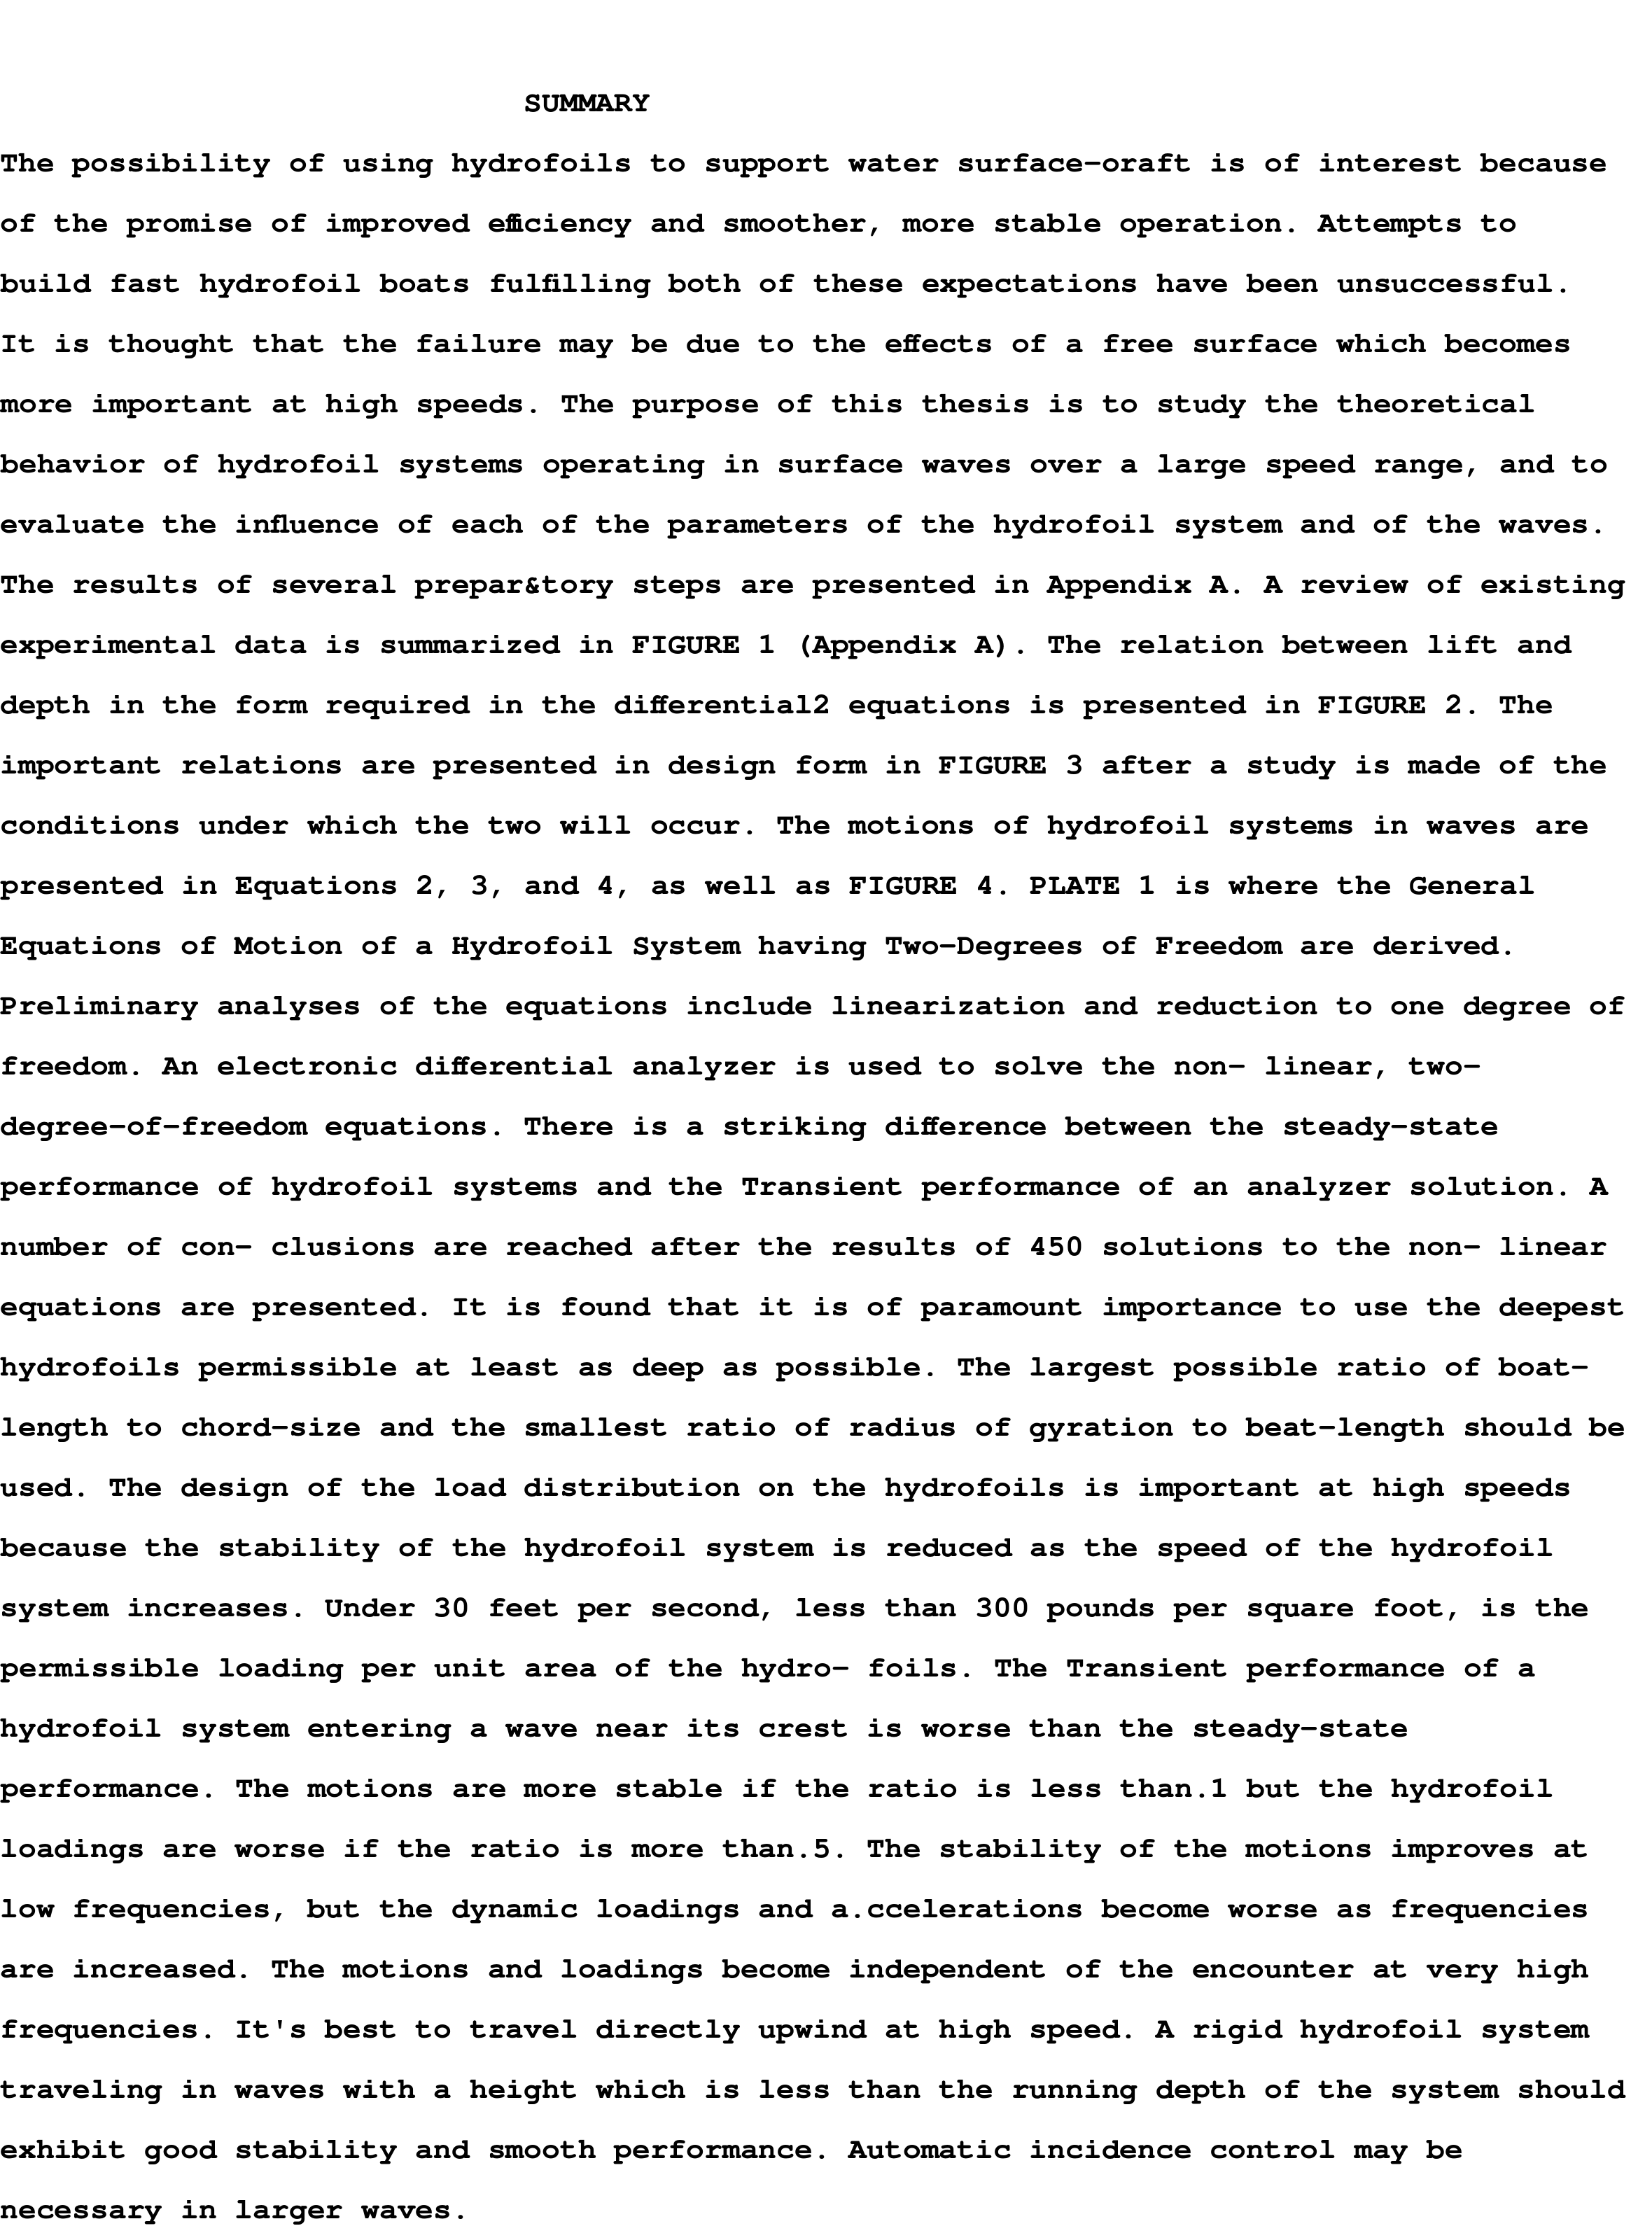

In [703]:
text_on_img(title_gabs, 43)

In [527]:
from PIL import Image, ImageDraw, ImageFont
import os

### Custom Textwrap

In [314]:
def text_wrap(text,font,writing,max_width,max_height):
    lines = [[]]
    words = text.split()
    for word in words:
        # try putting this word in last line then measure
        lines[-1].append(word)
        (w,h) = writing.multiline_textsize('\n'.join([' '.join(line) for line in lines]), font=font)
        if w > max_width: # too wide
            # take it back out, put it on the next line, then measure again
            lines.append([lines[-1].pop()])
            (w,h) = writing.multiline_textsize('\n'.join([' '.join(line) for line in lines]), font=font)
            if h > max_height: # too high now, cannot fit this word in, so take out - add ellipses
                lines.pop()
                # try adding ellipses to last word fitting (i.e. without a space)
                lines[-1][-1] += '...'
                # keep checking that this doesn't make the textbox too wide, 
                # if so, cycle through previous words until the ellipses can fit
                while writing.multiline_textsize('\n'.join([' '.join(line) for line in lines]),font=font)[0] > max_width:
                    lines[-1].pop()
                    if lines[-1]:
                        lines[-1][-1] += '...'
                    else:
                        lines[-1].append('...')
                break
    return '\n'.join([' '.join(line) for line in lines])

In [412]:
filename = '13.png'
W,H = (2550, 3300)

def text_on_img(text, size):
    font = ImageFont.truetype('NimbusMonoPS-Bold.otf', size)
    image = Image.new(mode = "RGB", size = (W, H), color = "white")
    draw = ImageDraw.Draw(image)
    wrapped_text = text_wrap(text, font, draw, 2550, 3300)
    #print(wrapped_text)
    w, h = draw.textsize(text)
    draw.text(((W-w)/50000,(H-h)/200), wrapped_text, font=font, fill=(0,0,0), spacing=55)
    image.save(filename)

    return image

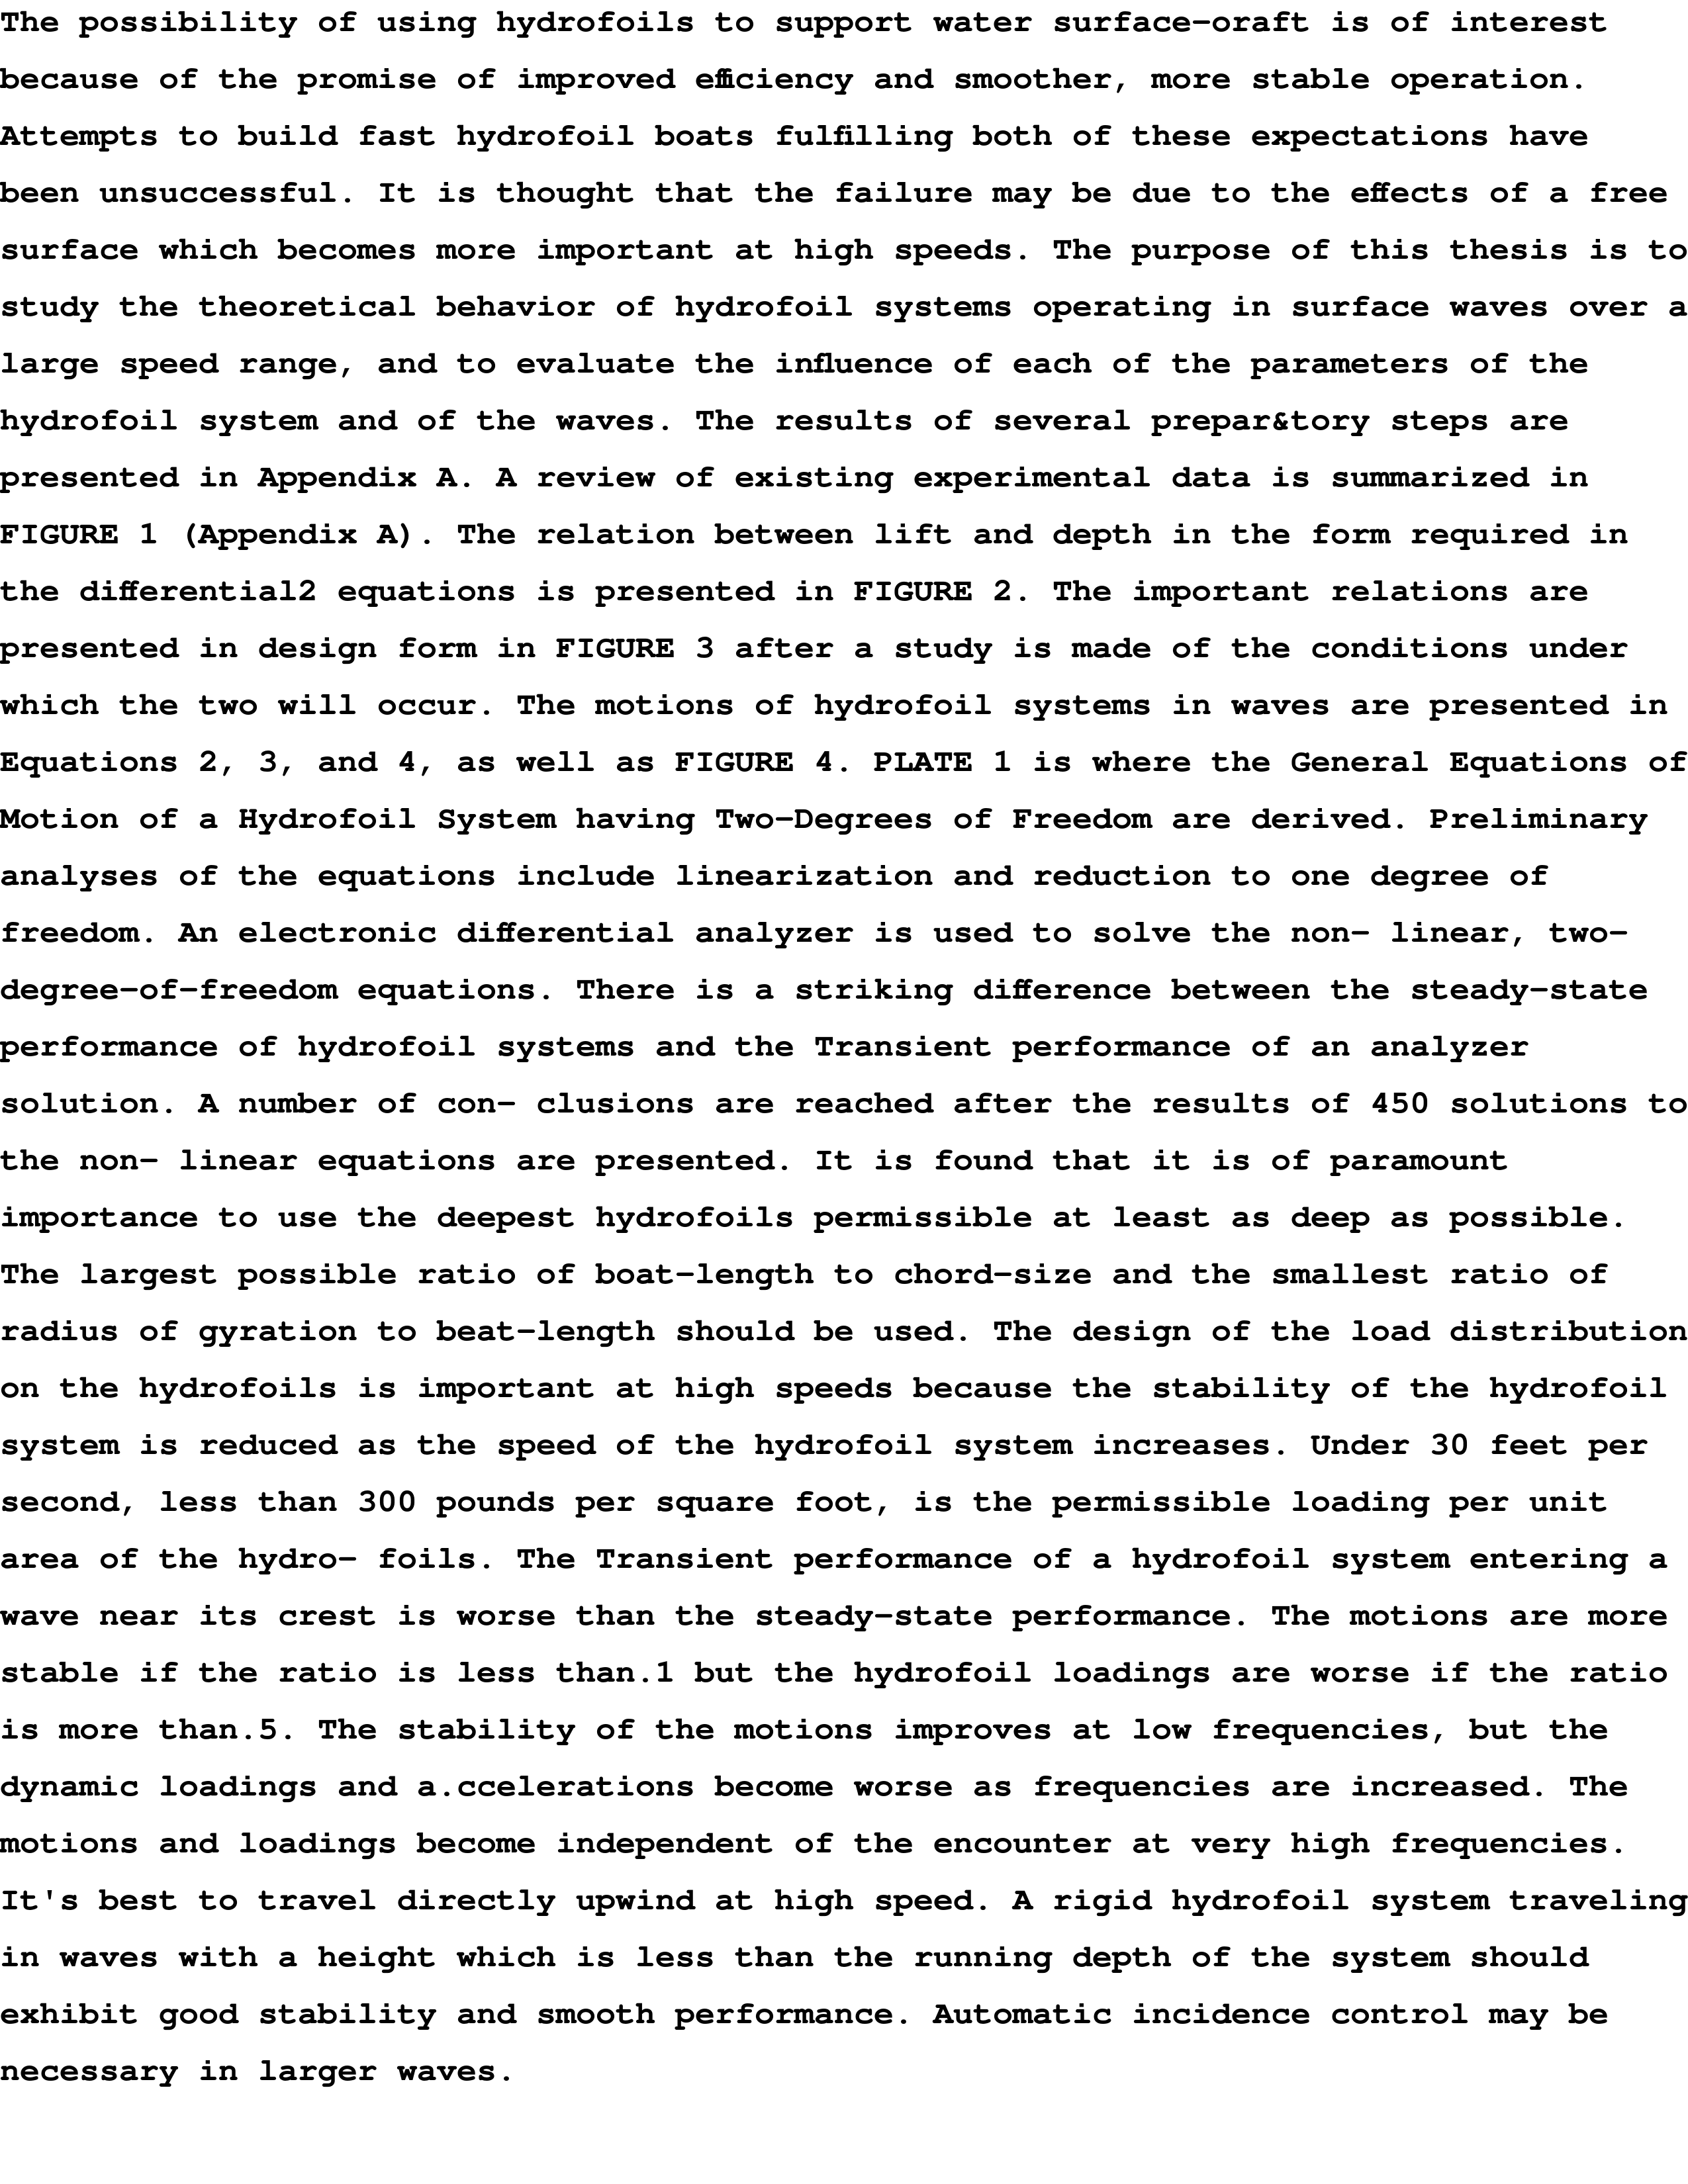

In [413]:
text_on_img(phrase, size=50)

In [704]:
im = Image.open('15.png')
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

In [705]:
im_new = add_margin(im, 96, 96, 96, 96, (255, 255, 255))
im_new.save('16.png', quality=95)

### Create a sythentic image data using the paraphrased text

In [134]:
filename = '13.png'
def fit_text(text, text_size, text_color,font_file):
    
    """
    :param text: The text that needs to be fir inside the bounding box (words separated by ,)
    :type text: str
    :param text_size: The size of the text
    :type text_size: int
    :param text_color: The color of the text
    :type text_color: Tuple(int, int, int) | str
    :param font_file: The file of the font of the text
    :type font_file: str
    :return: The image
    :rtype: Image
    """
    W, H = (2550, 3300)
    img_fraction = 0.5
    fontsize = 12

    # Replaces every ',' to '-' because the wrapper library will associate '-' as a separator and sorts by length
#     text = text.split(',')
#     text.sort(key=len, reverse=True)
#     text = ','.join(text)
#     text = text.replace(',', '-')
#     #print(text)

    # Changes the text size to fit the box if the longest word cannot fit in one line
    font = ImageFont.truetype(font_file, text_size)
    
#     # Initializes the text wrapper
#     wrapper = textwrap.TextWrapper()

#     # Wrap the text
#     text = wrapper.fill(text=text)
#     print(text)

    img = Image.new(mode = "RGB", size = (W, H), color = "white")
    

    # Initializes the ImageDraw.Draw for the img so I can draw on it
    draw = ImageDraw.Draw(im=img)
    
    while font.getsize(text)[0] < img_fraction*img.size[0]:
        # iterate until the text size is just larger than the criteria
        fontsize +=1
        font = ImageFont.truetype(font_file, text_size)
    
    # optionally de-increment to be sure it is less than criteria
    fontsize -= 1
    font = ImageFont.truetype(font_file, text_size)
    
    w, h = draw.textsize(text)
    print(w,h)

    #Replaces every '-' back to ','
    text = text.replace('-', ' ')
    print(text)

    # Checks if the first char is ' ' if it is it will be cut out
    if text[0] == ' ':
        text = text[1:]

    # Draws the text
    draw.multiline_text(((W-w)/50,(H-h)/20), text=text, font=font, fill=text_color, spacing=70)
    img.save(filename)

    return img

1404 371
The possibility of using hydrofoils to support water surface oraft is of interest because of the promise of improved efficiency and smoother, more stable operation
Attempts to build fast hydrofoil boats fulfilling both of these expectations have been unsuccessful
It is thought that the failure may be due to the effects of a free surface which becomes more important at high speeds
The purpose of this thesis is to study the theoretical behavior of hydrofoil systems operating in surface waves over a large speed range, and to evaluate the influence of each of the parameters of the hydrofoil system and of the waves
The results of several prepar&tory steps are presented in Appendix A
A review of existing experimental data is summarized in FIGURE 1 (Appendix A)
The relation between lift and depth in the form required in the differential2 equations is presented in FIGURE 2
The important relations are presented in design form in FIGURE 3 after a study is made of the conditions under wh

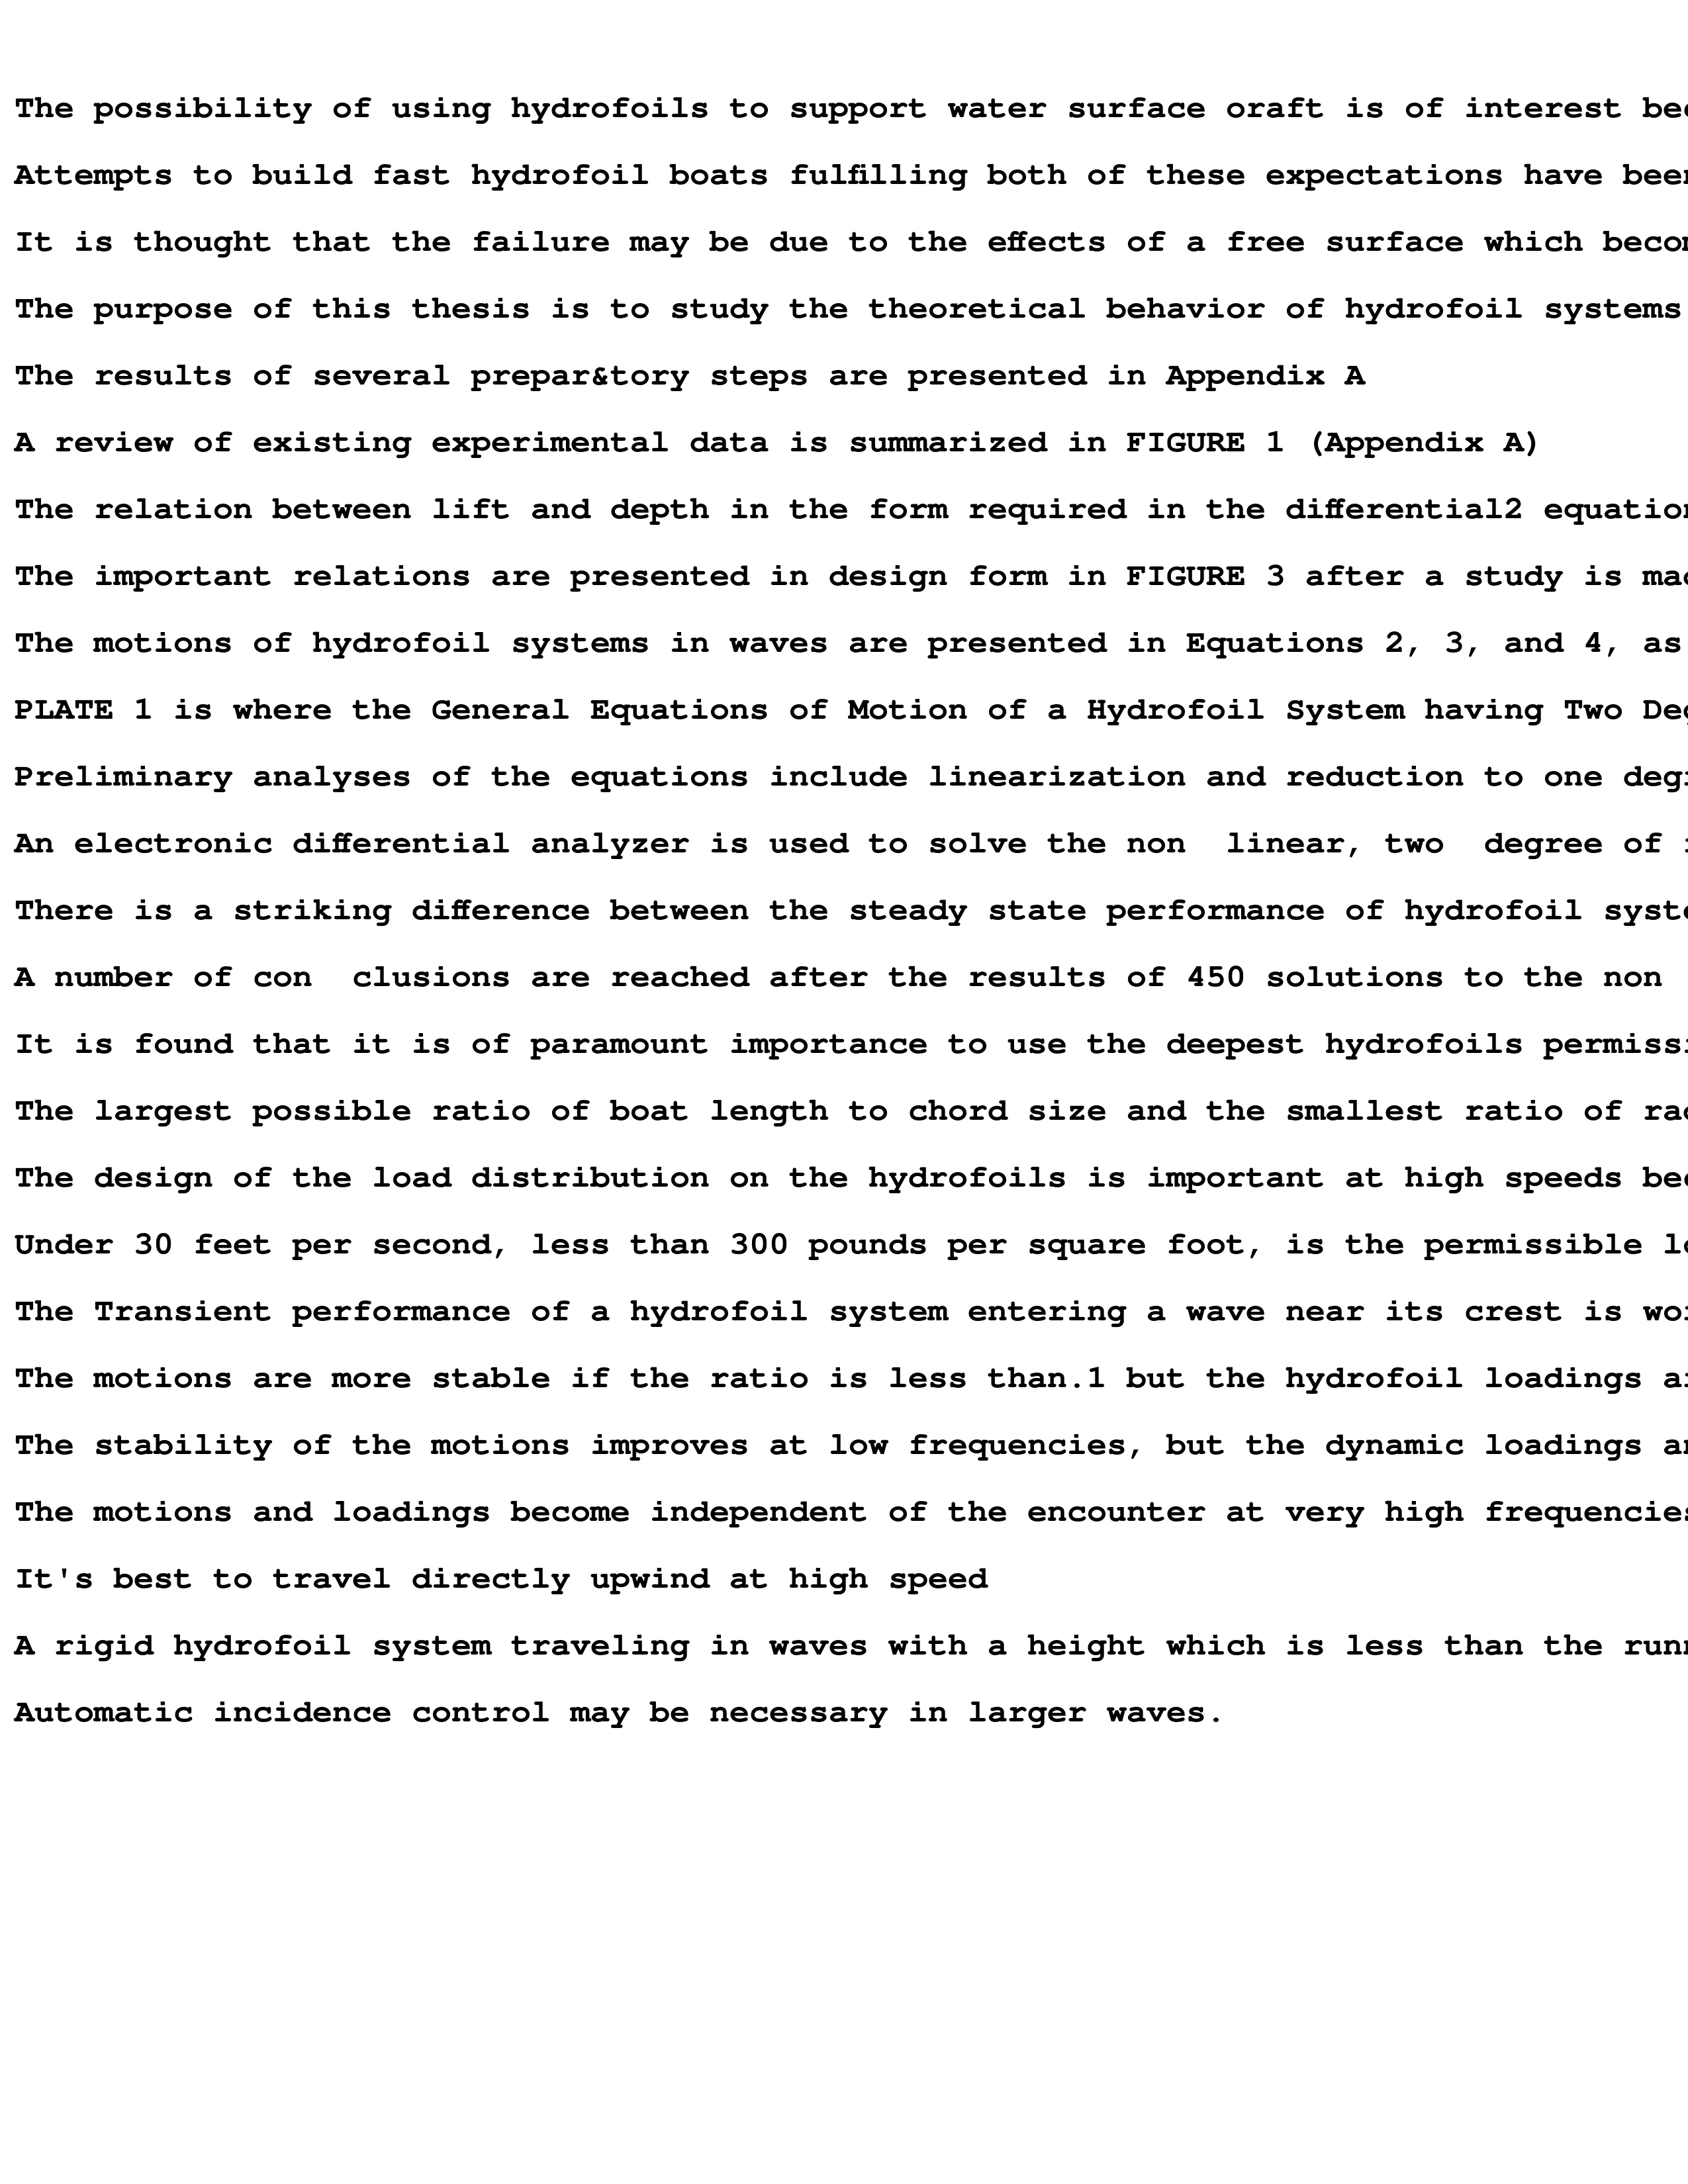

In [136]:
fit_text(phrase, 50, (0), 'NimbusMonoPS-Bold.otf')